In [1]:
# imports

import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
import contractions
import string
import unidecode

In [2]:
# data pre-processing

def text_clean(sentence):
    
    # to remove punctuation symbols
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    
    # to remove URLs
    sentence = re.compile(r'https?://\S+|www\.\S+').sub(r'', sentence)
    
    # to remove HTML tags
    sentence = re.compile('<.*?>').sub(r'', sentence)
    
    # to remove stopwords
    sentence =   ' '.join([word for word in sentence.split() if word not in stopwords.words('english')])
    
    # to make words lower case
    sentence = sentence.lower()
    
    # to convert accented characters into standard english characters
    sentence = unidecode.unidecode(sentence)
    
    # to expand short contractions in text
    sentence = contractions.fix(sentence)
    
    # to lemmatise words
    sentence = " ".join([WordNetLemmatizer().lemmatize(word) for word in sentence.split()])
    
    
    return sentence
    

In [3]:
# retrieving the review dataframe

df = pd.read_csv("data.csv")



In [4]:
# applying the pre-processing techniques on the review dataframe

new_df = df["reviews"].apply(text_clean)
lst = new_df.to_list()

In [5]:
# importing sentiment analysis module

from nrclex import NRCLex as nrc

def top_emotion(sentence):
    top_emot = nrc(sentence)
    return top_emot.top_emotions

In [6]:

# filtering out the emotions of each post and storing them in below list


final_lst =[]



for i in range(len(lst)):
    
    emot = nrc(lst[i])
    
    
    top_emo = emot.top_emotions[0][0] #to get top emotion
    emo_lst = emot.affect_list # to get list of emotions sensed in the post
    
    
    
    
    
    
    
    # positive mixture and negative mixture alone will not indicate much about the rasas
    # hence the data is being inflated over here by taking in 3 emotions from emo_lst
    # provides us with a better sense of the data
    
    if top_emo == "positive":
        
        
        final_lst.append(emo_lst[0:2])
        
    elif top_emo == "negative":
        
        
        final_lst.append(emo_lst[0:2])
        
        
    
    else:   
        
        # posts without a positive mixture/negative mixture will be allocated only their top emotion
 
        final_lst.append([top_emo])
    
    print(final_lst[i])
    print("\n")
    
    
print(final_lst)


['negative', 'positive']


['anticipation', 'positive']


['positive', 'trust']


['fear', 'negative']


['positive', 'positive']


['anticipation', 'anticipation']


['negative', 'negative']


['anticipation', 'joy']


['positive']


['positive', 'joy']


['positive']


['anticipation', 'joy']


['anticipation', 'joy']


['anger', 'fear']


['positive', 'positive']


['joy', 'positive']


['anticipation', 'joy']


['anticipation', 'joy']


['joy', 'positive']


['positive', 'joy']


['surprise']


['trust', 'anticipation']


['negative', 'joy']


['anticipation', 'anticipation']


['joy', 'positive']


['negative', 'anticipation']


['positive', 'trust']


['positive', 'anticipation']


['anticipation', 'joy']


['anticipation', 'negative']


['positive', 'anticipation']


['positive', 'anticipation']


['anticipation', 'joy']


['joy', 'positive']


['positive', 'positive']


['trust']


['positive', 'positive']


['fear']


['positive', 'positive']


['trust']


['joy', 'positive']


In [7]:
# flattening the list

from itertools import chain

combi_lst=[ x for y in final_lst for x in y]

print(combi_lst)

['negative', 'positive', 'anticipation', 'positive', 'positive', 'trust', 'fear', 'negative', 'positive', 'positive', 'anticipation', 'anticipation', 'negative', 'negative', 'anticipation', 'joy', 'positive', 'positive', 'joy', 'positive', 'anticipation', 'joy', 'anticipation', 'joy', 'anger', 'fear', 'positive', 'positive', 'joy', 'positive', 'anticipation', 'joy', 'anticipation', 'joy', 'joy', 'positive', 'positive', 'joy', 'surprise', 'trust', 'anticipation', 'negative', 'joy', 'anticipation', 'anticipation', 'joy', 'positive', 'negative', 'anticipation', 'positive', 'trust', 'positive', 'anticipation', 'anticipation', 'joy', 'anticipation', 'negative', 'positive', 'anticipation', 'positive', 'anticipation', 'anticipation', 'joy', 'joy', 'positive', 'positive', 'positive', 'trust', 'positive', 'positive', 'fear', 'positive', 'positive', 'trust', 'joy', 'positive', 'anticipation', 'negative', 'trust', 'fear', 'trust', 'negative', 'sadness', 'trust', 'positive', 'trust', 'anger', 'ant

In [8]:
#obtaining a count of emotions experienced overall

count_dict = {"positive mixture":0,"negative mixture":0,"joy":0,"sadness":0,"fear":0,"anger":0,"anticipation":0,"trust":0,"surprise":0,"disgust":0}

for j in range(len(combi_lst)):
    
    if combi_lst[j]== "positive":
        count_dict["positive mixture"]+=1
        
    if combi_lst[j]=="negative":
        count_dict["negative mixture"]+=1
        
    if combi_lst[j]=="joy":
        count_dict["joy"]+=1
    
    if combi_lst[j]=="sadness":
        count_dict["sadness"]+=1
    
    if combi_lst[j]=="fear":
        count_dict["fear"]+=1
    
    if combi_lst[j]=="anger":
        count_dict["anger"]+=1
    
    if combi_lst[j]=="anticipation":
        count_dict["anticipation"]+=1
    
    if combi_lst[j]=="trust":
        count_dict["trust"]+=1
    
    if combi_lst[j]=="surprise":
        count_dict["surprise"]+=1
    
    if combi_lst[j]=="disgust":
        count_dict["disgust"]+=1
        
print(count_dict)


{'positive mixture': 54, 'negative mixture': 13, 'joy': 25, 'sadness': 1, 'fear': 12, 'anger': 2, 'anticipation': 31, 'trust': 14, 'surprise': 2, 'disgust': 1}


In [9]:
# obtaining values from the dictionary above to plot data

key_count = []

for k in count_dict.keys():
    
    key_count.append(k)



value_count = []

for v in count_dict.values():
    
    value_count.append(v)

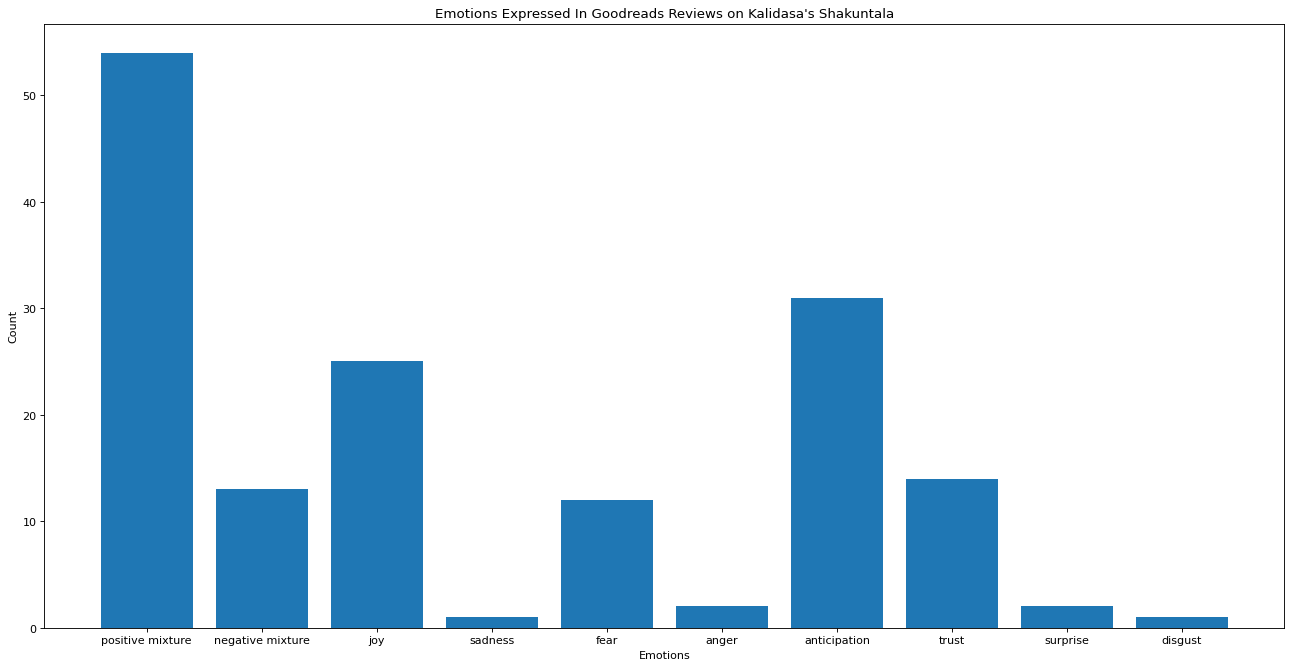

In [16]:
# plotting of data

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



figure(figsize=(20, 10), dpi=80)

x = key_count
y= value_count

plt.ylabel("Count")
plt.xlabel("Emotions")

plt.title("Emotions Expressed In Goodreads Reviews on Kalidasa's Shakuntala")

plt.bar(x,y)
plt.savefig("graph.jpg")
plt.show()